In [1]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from bellem.dvc.experiment import load_experiments

experiments = load_experiments('custom-prompts-hotpotqa.json')
print(f"{len(experiments)} experiments")
experiments[0]

57 experiments


{'commit': 'workspace',
 'id': 'workspace',
 'name': None,
 'params': {'dataset': {'path': 'bdsaglam/hotpotqa-distractor',
   'name': 'default',
   'split': 'validation'},
  'qa': {'model': 'llama-3-70b-tgi',
   'temperature': 0.1,
   'system_prompt': 'no-role.txt',
   'user_prompt_template': 'cq.txt',
   'few_shot_examples': 'empty.json'},
  'run': 1},
 'metrics': {'exact_match': 0.6178257933828494,
  'f1': 0.7896479015986282,
  'fuzzy_match': 0.6960162052667117,
  '2hops': {'exact_match': 0.6178257933828494,
   'f1': 0.7896479015986282,
   'fuzzy_match': 0.6960162052667117}}}

In [3]:
df = pd.json_normalize(experiments).drop(columns=["commit", "id", "name"])

param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop_duplicates(subset=param_cols, inplace=True)

df = df[df['params.dataset.path']=='bdsaglam/hotpotqa-distractor'].copy()
df.reset_index(drop=True, inplace=True)

In [4]:
target_params = [
    "params.qa.model",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.run",
]
df = df.sort_values(target_params)
df

,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.run,metrics.exact_match,...,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match,params.train.dataset.path,params.train.dataset.name,params.train.dataset.split,params.train.optimizer,params.evaluation.dataset.path,params.evaluation.dataset.name,params.evaluation.dataset.split
23,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cot.txt,cq.txt,cot-2-shot.json,1,0.633626,...,0.633626,0.783866,0.683457,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation
22,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cot.txt,cq.txt,cot-2-shot.json,2,0.633221,...,0.633221,0.783552,0.682512,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation
24,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cot.txt,cq.txt,cot-2-shot.json,3,0.631195,...,0.631195,0.782871,0.683457,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation
2,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cot.txt,cq.txt,empty.json,1,0.593248,...,0.593248,0.771597,0.685348,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation
3,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cot.txt,cq.txt,empty.json,2,0.595273,...,0.595273,0.773852,0.687238,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation
1,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cot.txt,cq.txt,empty.json,3,0.592978,...,0.592978,0.772101,0.685348,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation
39,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cte.txt,cq.txt,cte-2-shot.json,1,0.659554,...,0.659554,0.812287,0.711816,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation
37,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cte.txt,cq.txt,cte-2-shot.json,2,0.661310,...,0.661310,0.814116,0.713437,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation
38,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cte.txt,cq.txt,cte-2-shot.json,3,0.659554,...,0.659554,0.813097,0.711951,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation
33,bdsaglam/hotpotqa-distractor,default,validation,llama-3-70b-tgi,0.1,cte.txt,cq.txt,empty.json,1,0.647670,...,0.647670,0.802866,0.700743,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation


In [5]:
import re

def parse_n_shot(x):
    if 'empty' in x:
        return 0
    # match the digit in the string
    x = re.search(r'\d+', x).group()
    return int(x)

assert parse_n_shot('empty.json') == 0
assert parse_n_shot('cot-2-shot.json') == 2

In [6]:
df['params.qa.few_shot_examples'] = df['params.qa.few_shot_examples'].map(parse_n_shot)

In [7]:
df['params.qa.system_prompt'].unique().tolist()

['cot.txt',
 'cte.txt',
 'excellent-qa-cot.txt',
 'excellent-qa-cte.txt',
 'excellent-qa-few.txt',
 'excellent-qa-fewest.txt',
 'minimal-output-format-answer-cue-least.txt',
 'minimal-output-format-answer-cue.txt',
 'minimal-output-format-answer-few-no-prio.txt',
 'minimal-output-format.txt',
 'minimal.txt',
 'no-role.txt']

In [8]:
mapping = {
    'minimal.txt': 'm',
    'minimal-output-format.txt': 'm-o',
    'minimal-output-format-answer-cue.txt': 'm-o-few',
    'minimal-output-format-answer-cue-least.txt': 'm-o-fewest',
    'minimal-output-format-answer-few-no-prio.txt': 'm-o-few-no-prio',
    'excellent-qa-few.txt': 'exc-few',
    'excellent-qa-fewest.txt': 'exc-fewest',
    'excellent-qa-cot.txt': 'exc-cot',
    'excellent-qa-cte.txt': 'exc-cte',
    'cte.txt': 'cte',
    'cot.txt': 'cot',
}
df['params.qa.system_prompt'] = df['params.qa.system_prompt'].map(lambda x: mapping.get(x, x))

In [9]:
run_counts = (
    df.groupby(["params.qa.system_prompt", "params.qa.user_prompt_template", "params.qa.few_shot_examples"])[
        metric_cols[:1]
    ]
    .count()
    .reset_index()
)
mask = run_counts[metric_cols[0]] < 3
run_counts.loc[mask]

,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,metrics.exact_match
16,m-o-few-no-prio,cq.txt,0,2
19,no-role.txt,cq.txt,0,1


In [10]:
# Average metrics over repeated runs (params.run)
df_avg = (
    df.groupby(["params.qa.system_prompt", "params.qa.user_prompt_template", "params.qa.few_shot_examples"])[
        metric_cols
    ]
    .mean()
    .reset_index()
)
df_avg[["params.qa.system_prompt", 'params.qa.user_prompt_template', "params.qa.few_shot_examples", *metric_cols]].sort_values('metrics.2hops.f1', ascending=False)

,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match
5,exc-cte,cq.txt,2,0.667252,0.813845,0.714742,0.667252,0.813845,0.714742
3,cte,cq.txt,2,0.660140,0.813166,0.712402,0.660140,0.813166,0.712402
7,exc-few,cq.txt,2,0.658024,0.808459,0.707315,0.658024,0.808459,0.707315
9,exc-fewest,cq.txt,2,0.663831,0.807695,0.706550,0.663831,0.807695,0.706550
2,cte,cq.txt,0,0.647490,0.803340,0.700743,0.647490,0.803340,0.700743
8,exc-fewest,cq.txt,0,0.654963,0.801151,0.696061,0.654963,0.801151,0.696061
18,m-o-fewest,cq.txt,0,0.653612,0.800218,0.694216,0.653612,0.800218,0.694216
17,m-o-fewest,cq-sep.txt,0,0.653792,0.799095,0.693315,0.653792,0.799095,0.693315
12,m-o,cq-sep.txt,0,0.637767,0.796197,0.681567,0.637767,0.796197,0.681567
13,m-o,cq.txt,0,0.635111,0.794818,0.677200,0.635111,0.794818,0.677200


In [11]:
df_target = df_avg.copy()
df_target.sort_values('metrics.f1', inplace=True)

In [12]:
mask = df_target['params.qa.few_shot_examples'] == 0
df_target.loc[mask].sort_values('metrics.f1', ascending=False).drop(columns=['params.qa.few_shot_examples'])

,params.qa.system_prompt,params.qa.user_prompt_template,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match
2,cte,cq.txt,0.647490,0.803340,0.700743,0.647490,0.803340,0.700743
8,exc-fewest,cq.txt,0.654963,0.801151,0.696061,0.654963,0.801151,0.696061
18,m-o-fewest,cq.txt,0.653612,0.800218,0.694216,0.653612,0.800218,0.694216
17,m-o-fewest,cq-sep.txt,0.653792,0.799095,0.693315,0.653792,0.799095,0.693315
12,m-o,cq-sep.txt,0.637767,0.796197,0.681567,0.637767,0.796197,0.681567
13,m-o,cq.txt,0.635111,0.794818,0.677200,0.635111,0.794818,0.677200
6,exc-few,cq.txt,0.625298,0.793988,0.699437,0.625298,0.793988,0.699437
14,m-o-few,cq-sep.txt,0.620527,0.793233,0.699392,0.620527,0.793233,0.699392
19,no-role.txt,cq.txt,0.617826,0.789648,0.696016,0.617826,0.789648,0.696016
15,m-o-few,cq.txt,0.610849,0.789404,0.696601,0.610849,0.789404,0.696601


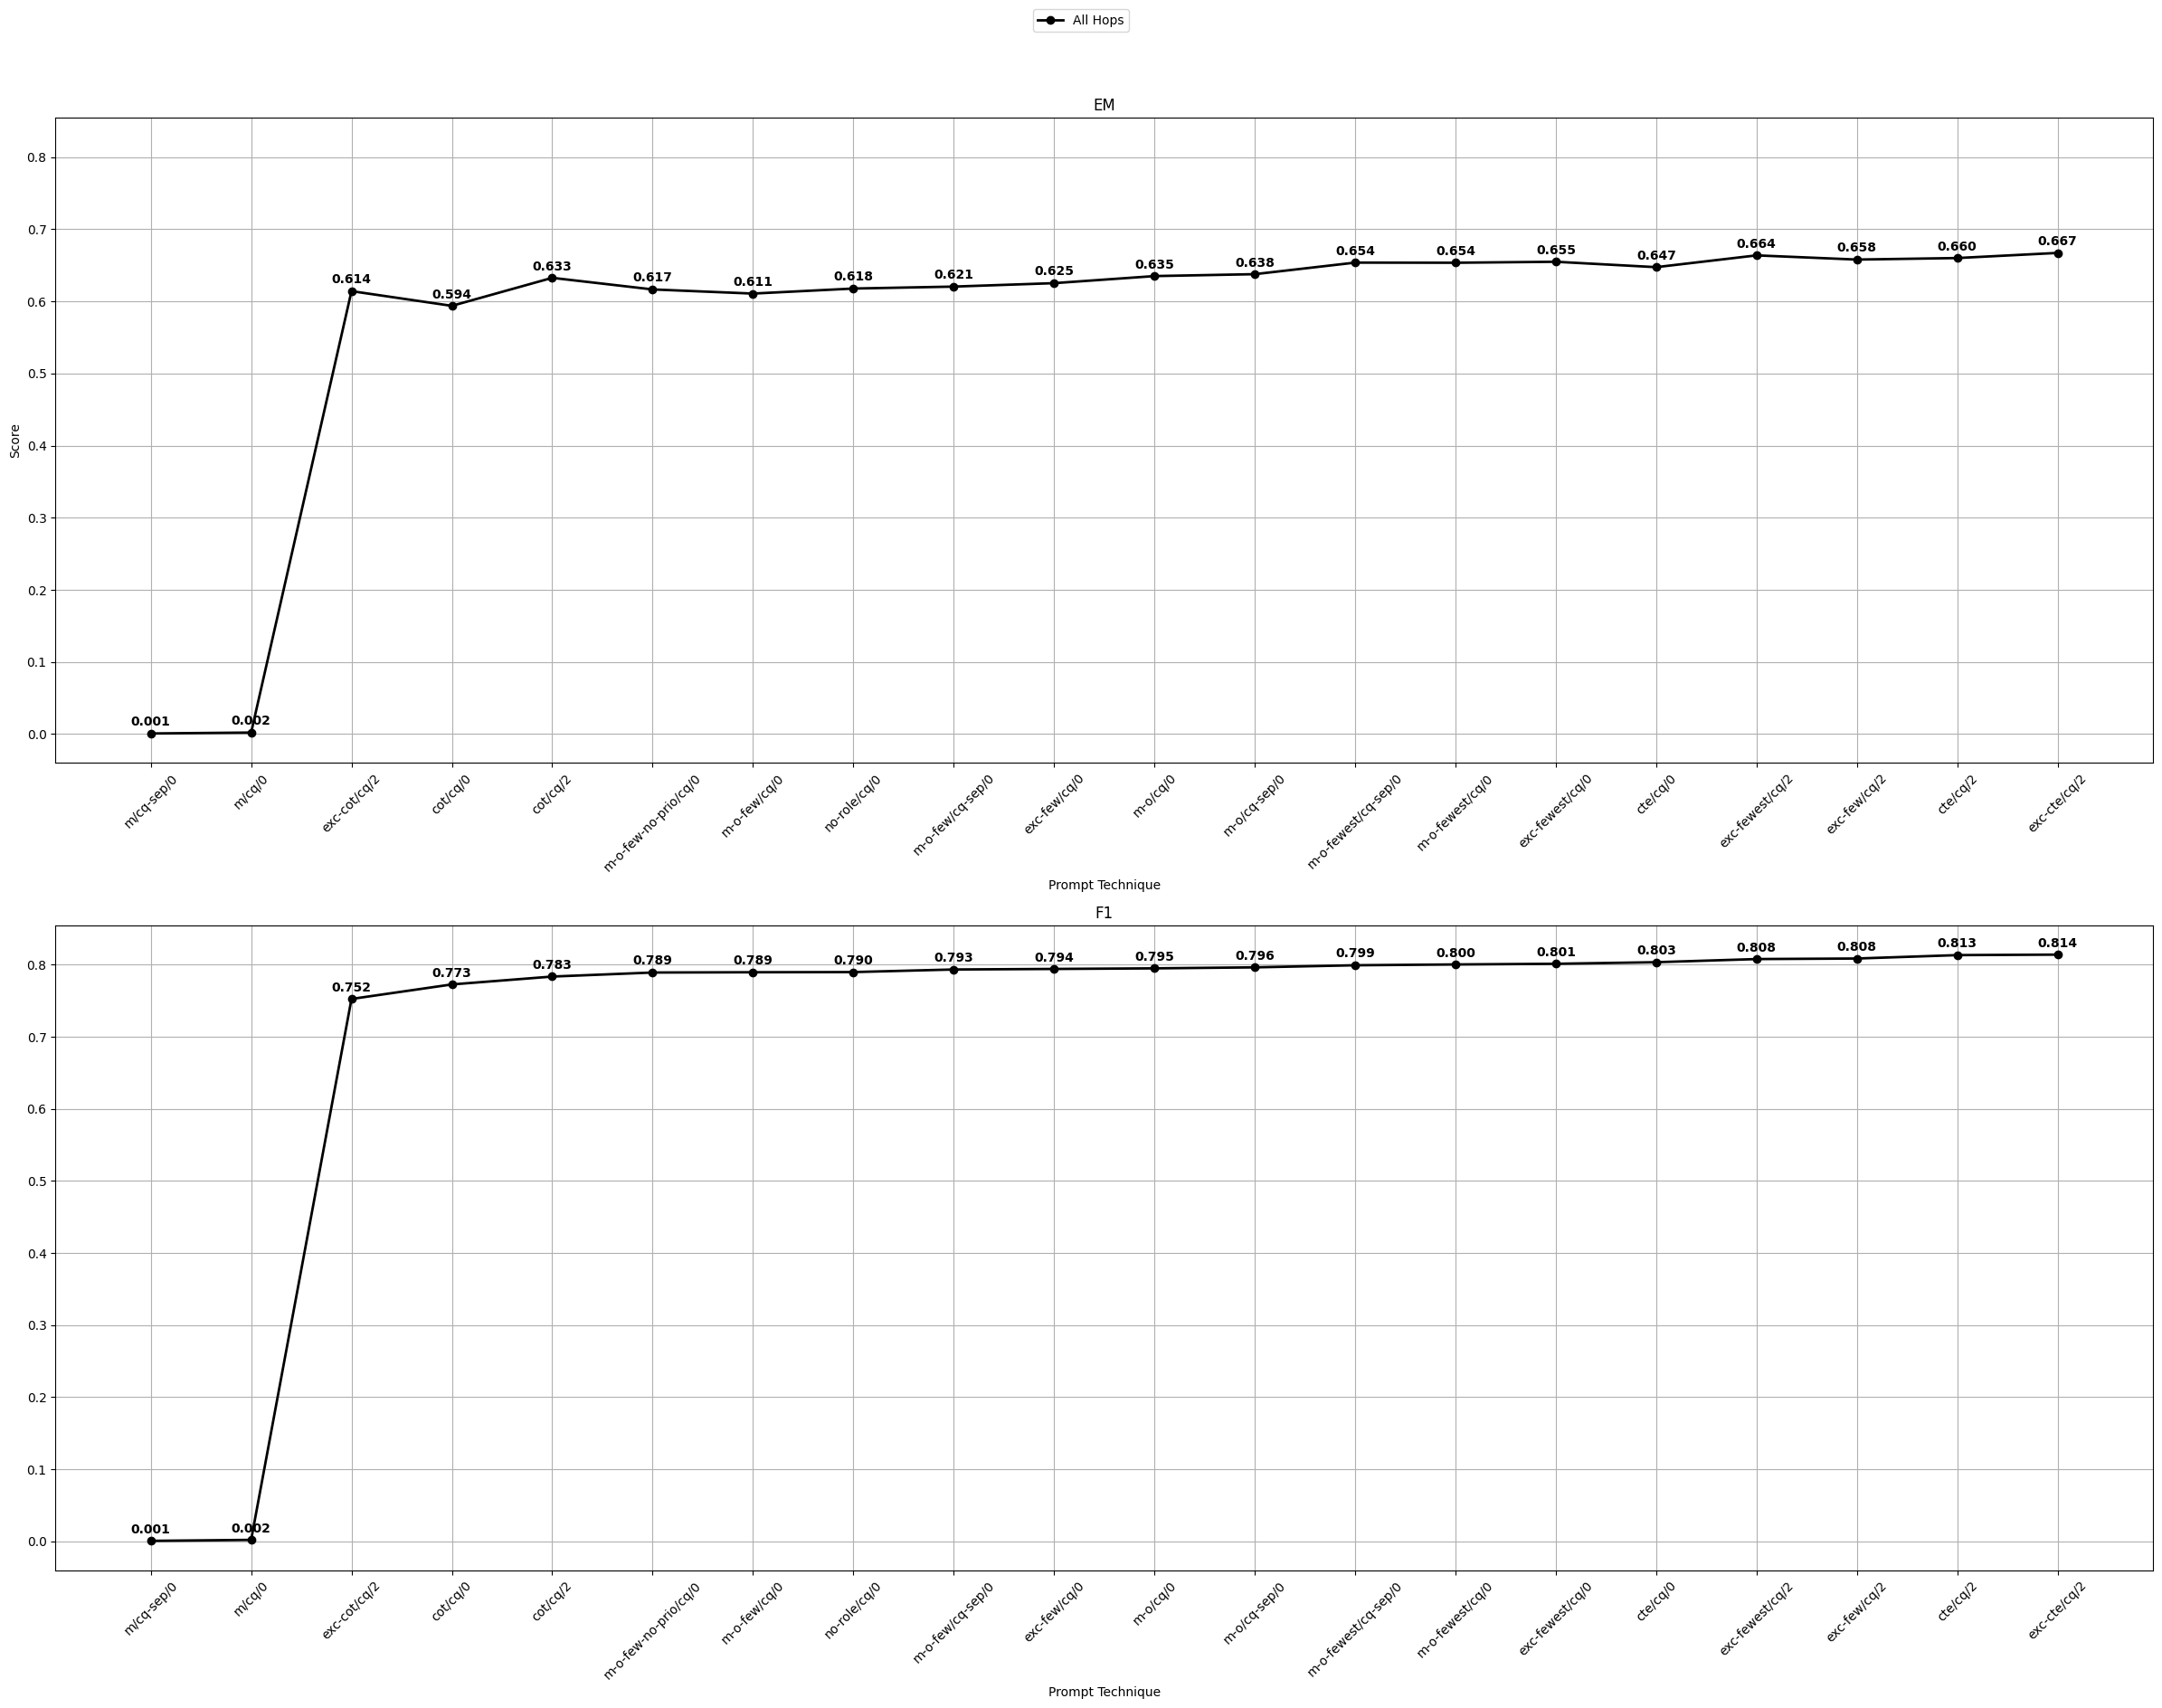

In [16]:
def plot_metric(ax, x, width, prompts, metrics, title, ylabel=None):
    # Plotting all hops as a line plot
    ax.plot(x, metrics["all"], label="All Hops", color="k", linestyle="-", marker="o", linewidth=2)

    # Adding values on top of the line plot
    for i, value in enumerate(metrics["all"]):
        ax.text(
            x[i],
            value+0.007,
            f"{value:.3f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    # Adjust titles and labels
    ax.set_title(title)
    ax.set_xlabel("Prompt Technique")
    ax.set_xticks(x)
    ax.set_xticklabels([prompt.replace(".txt", "") for prompt in prompts], rotation=45)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.grid(True)


# Creating subplots for Exact Match and F1, separating them for clarity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 18), sharey=True)

width = 0.3  # Bar width adjustment

# Changing the order of prompts to standard, cot-zs, cot-fs, cte
prompts = [f"{sp}/{up}/{fs}" for sp, up, fs in zip(df_target['params.qa.system_prompt'].values, df_target["params.qa.user_prompt_template"].values, df_target['params.qa.few_shot_examples'].values)]
x = np.arange(len(prompts))

# Plotting Exact Match
metrics_em = {
    "all": df_target["metrics.exact_match"].values,
}
plot_metric(ax1, x, width, prompts, metrics_em, title="EM", ylabel="Score")

# Plotting F1
metrics_f1 = {
    "all": df_target["metrics.f1"].values,
}
plot_metric(ax2, x, width, prompts, metrics_f1, title="F1")

# Creating a shared legend outside the plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=4)

plt.tight_layout()
plt.show()